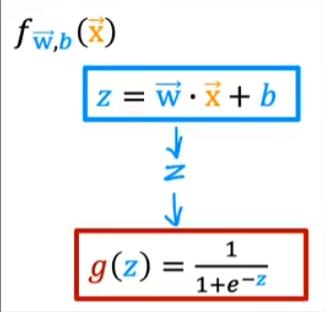 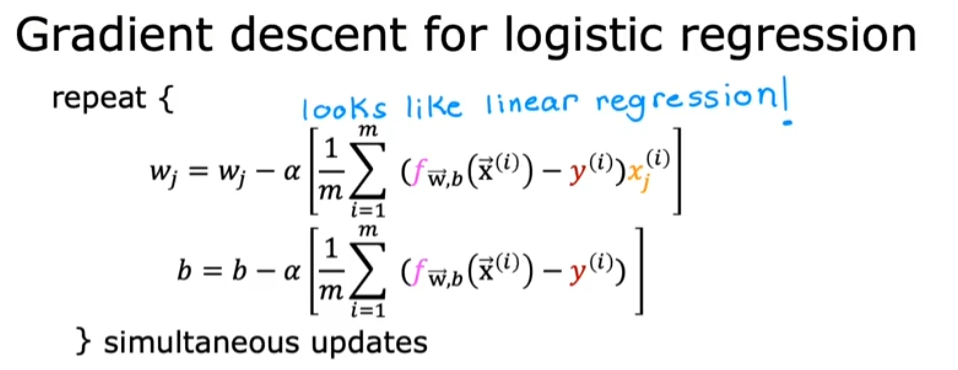

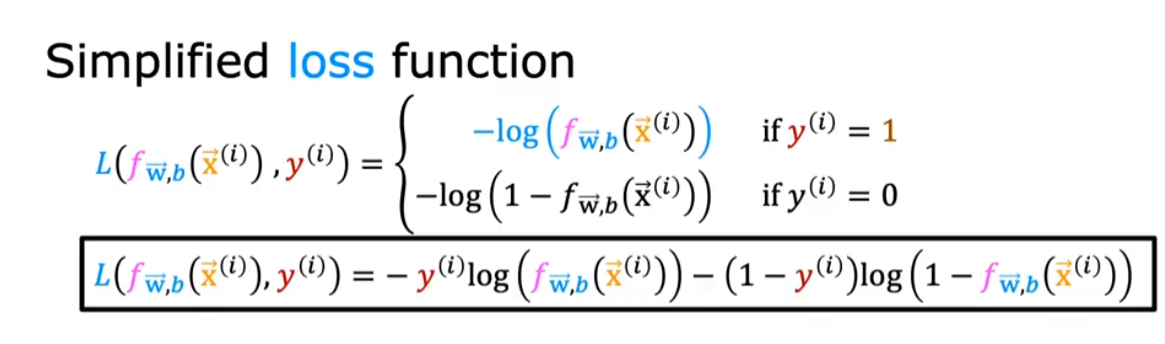
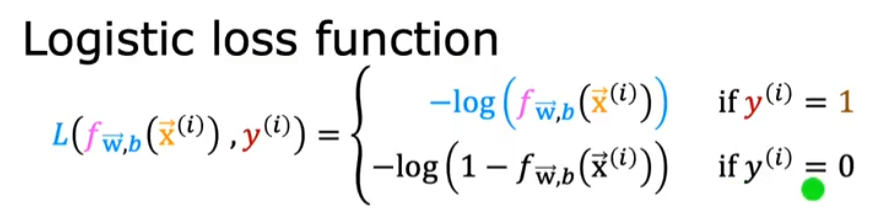

In [195]:
import numpy as np

In [ ]:
class logistic_regression:
    def __init__(self):
        self.theta = None
    

    def initialize_parameters(self, num_features):
        self.theta = np.zeros(num_features + 1)

    def prepare_features(self, X):
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        
        X_b = np.c_[np.ones(X.shape[0]), X]
        return X_b
    
    def loss_function(self, y, sigmoid):
        m = len(y)
        for_1 = y.dot(np.log(sigmoid))
        for_0 = (1-y).dot(np.log(1-sigmoid))
        return -(1/m)*(for_0 + for_1)
    

    def fit(self, X, y, alpha, iterations):
        X_modi = self.prepare_features(X)
        m = len(y)
        num_features = 1 if X.ndim == 1 else X.shape[1]
        self.initialize_parameters(num_features)
        loss_hist = []
        for i in range(iterations):
            inner_func = X_modi.dot(self.theta)
            sigmoid_func = 1/ (1 + np.exp(-inner_func)) 

            loss_func= self.loss_function(y, sigmoid_func)
            loss_hist.append(loss_func)

            error = sigmoid_func - y
            derivatives = (1/m) * X_modi.T.dot(error)

            self.theta = self.theta - alpha*derivatives
        
        return loss_hist
    
    def predict(self, X):
        modi_X = self.prepare_features(X)
        linear = modi_X.dot(self.theta)
        prob = 1 / (1 + np.exp(-linear))
        prediction = (prob >= 0.5).astype(int)
        return prediction
    
    def accuracy(self, prediction, actual):
        error = prediction - actual
        boolean_mask = (error == 0)
        correct = np.sum(boolean_mask)
        return (correct/len(prediction))

In [197]:
def generate_categorical_data(m=50, num_features=2, bias=-5, random_seed=None):

    # for the data to remain same 
    if random_seed is not None:
        np.random.seed(random_seed)

    # created the dataset
    X = np.random.rand(m, num_features) * 10

    # creating the parameters
    parameters = np.random.rand(num_features)

    # the linear part
    linear = X.dot(parameters) + bias

    # for the data to be realistic
    noise = np.random.rand(m) * 2

    # final output
    linear = linear + noise

    # labelling the data accodring to the condition
    y = (linear > 0).astype(int)

    return X, y


In [198]:
dataset, target = generate_categorical_data(m = 50, random_seed=42)
print(dataset)
print(target)

[[3.74540119 9.50714306]
 [7.31993942 5.98658484]
 [1.5601864  1.5599452 ]
 [0.58083612 8.66176146]
 [6.01115012 7.08072578]
 [0.20584494 9.69909852]
 [8.32442641 2.12339111]
 [1.81824967 1.8340451 ]
 [3.04242243 5.24756432]
 [4.31945019 2.9122914 ]
 [6.11852895 1.39493861]
 [2.92144649 3.66361843]
 [4.56069984 7.85175961]
 [1.99673782 5.14234438]
 [5.92414569 0.46450413]
 [6.07544852 1.70524124]
 [0.65051593 9.48885537]
 [9.65632033 8.08397348]
 [3.04613769 0.97672114]
 [6.84233027 4.40152494]
 [1.22038235 4.9517691 ]
 [0.34388521 9.09320402]
 [2.58779982 6.62522284]
 [3.11711076 5.20068021]
 [5.46710279 1.84854456]
 [9.69584628 7.75132823]
 [9.39498942 8.9482735 ]
 [5.97899979 9.21874235]
 [0.88492502 1.95982862]
 [0.45227289 3.25330331]
 [3.8867729  2.71349032]
 [8.28737509 3.56753327]
 [2.8093451  5.42696083]
 [1.40924225 8.02196981]
 [0.74550644 9.86886937]
 [7.72244769 1.98715682]
 [0.05522117 8.15461428]
 [7.06857344 7.29007168]
 [7.71270347 0.74044652]
 [3.58465729 1.1586906 ]


In [199]:
logistic_model = logistic_regression()

logistic_model.fit(X = dataset, y = target, alpha=0.3, iterations=1500)

[np.float64(0.6931471805599452),
 np.float64(0.5404007937807684),
 np.float64(0.5280331299693557),
 np.float64(0.5772042903221215),
 np.float64(0.7423262523337653),
 np.float64(0.8746258638277545),
 np.float64(0.926353495186638),
 np.float64(0.7510084711585221),
 np.float64(0.770765555590287),
 np.float64(0.6504340266180999),
 np.float64(0.6849733946148789),
 np.float64(0.6182323860358033),
 np.float64(0.6557634164108374),
 np.float64(0.6076266830175675),
 np.float64(0.6469771225745247),
 np.float64(0.6045162153099523),
 np.float64(0.6441659173867328),
 np.float64(0.6026034273914458),
 np.float64(0.6410741433909906),
 np.float64(0.5995070969497477),
 np.float64(0.6360869085490881),
 np.float64(0.5951583506593044),
 np.float64(0.6297521657284504),
 np.float64(0.5902166369397527),
 np.float64(0.6229381887802274),
 np.float64(0.5851976326569261),
 np.float64(0.616147708459124),
 np.float64(0.5803147684646768),
 np.float64(0.6095368699143698),
 np.float64(0.5755961468230203),
 np.float64(0

In [200]:
val_X, val_y = generate_categorical_data(m=50)

In [201]:
print(val_y)
logistic_model.predict(val_X)

[0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0
 1 1 1 1 0 0 1 1 1 0 1 1 1]


array([0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0])

In [202]:
logistic_model.accuracy(val_y, logistic_model.predict(val_X))

np.float64(0.48)